# Import Libraries

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 
import sklearn 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
# import anime dataset
anime = pd.read_csv(r'C:\Users\jecka\2023-12-05 Achievement 6\02 Data\Prepared Data\Anime Cleaned.csv', index_col = False)

In [4]:
# folder shortcut path 
path = r'C:\Users\jecka\2023-12-05 Achievement 6'

# Consistancy checks

In [5]:
anime.head()

,anime_id,title,country_origin,story_origin,type,score,scored_by,status,episodes,source,members,favorites,episode_duration,total_duration,rating,start_year,start_season,genres,demographics
0,1,Cowboy Bebop,Japan,Japan,tv,8.75,923377,finished_airing,26.0,original,1788584,79192,24.00,624.00,R,1998.0,spring,Action / Award Winning / Sci-Fi,NaN
1,5,Cowboy Bebop: Tengoku no Tobira,Japan,Japan,movie,8.38,207777,finished_airing,1.0,original,363968,1477,115.18,115.18,R,2001.0,summer,Action / Sci-Fi,NaN
2,6,Trigun,Japan,Japan,tv,8.22,359862,finished_airing,26.0,manga,733966,15265,24.67,641.33,PG_13,1998.0,spring,Action / Adventure / Sci-Fi,NaN
3,7,Witch Hunter Robin,Japan,Japan,tv,7.25,43038,finished_airing,26.0,original,112755,618,25.00,650.00,PG_13,2002.0,summer,Action / Drama / Mystery / Supernatural,NaN
4,8,Bouken Ou Beet,Japan,Japan,tv,6.94,6445,finished_airing,52.0,manga,15093,14,23.00,1196.00,PG,2004.0,fall,Adventure / Fantasy / Supernatural,NaN


In [6]:
anime.columns

Index(['anime_id', 'title', 'country_origin', 'story_origin', 'type', 'score',
       'scored_by', 'status', 'episodes', 'source', 'members', 'favorites',
       'episode_duration', 'total_duration', 'rating', 'start_year',
       'start_season', 'genres', 'demographics'],
      dtype='object')

In [7]:
#check for missing values 
anime.isnull().sum()

anime_id                0
title                   0
country_origin          0
story_origin            0
type                   58
score                8933
scored_by               0
status                  0
episodes              547
source               3160
members                 0
favorites               0
episode_duration      596
total_duration        821
rating                579
start_year            867
start_season         4681
genres               4987
demographics        23328
dtype: int64

# Creating Subset

In [8]:
sub = anime[['score', 'scored_by', 'episodes', 'members', 'favorites', 'start_year']].dropna()

In [9]:
sub.shape

(15950, 6)

In [10]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [ ]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 
#I was given many warnings which took up a lot of space so I merely cleared the output

In [13]:
score

[-821060481769040.1,
 -290744281210001.5,
 -142167676485279.7,
 -85617727717601.38,
 -55723577056697.94,
 -40328763775331.73,
 -29387991631449.043,
 -23161202573202.094,
 -18455067145946.43]

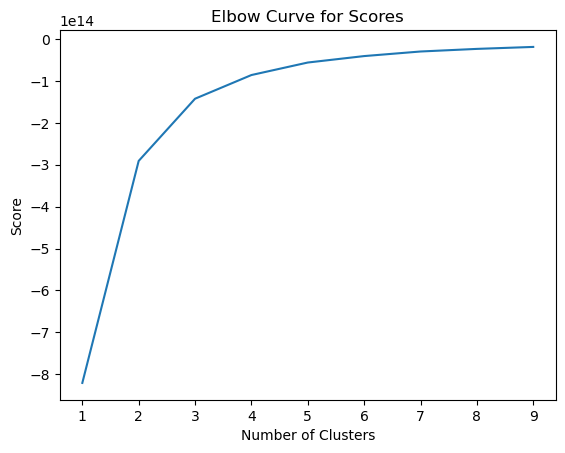

In [14]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve for Scores')
pl.show()

The elbow is where the curve begins to flatten. This begins at 3 but I think 4 fits better. I will use that total number of clusters as the score jumps too much from 2 to 3, but 3 to 4 is where it seems to smooth out more.

In [15]:
# Create the k-means object with 3 clusters
kmeans = KMeans(n_clusters = 4)

In [16]:
# Fit the k-means object to the data
kmeans.fit(sub)

C:\Users\jecka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [17]:
# Perform clustering using the k-means model and assign the results to new 'clusters' column
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\jecka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
sub.head()

,score,scored_by,episodes,members,favorites,start_year,clusters
0,8.75,923377,26.0,1788584,79192,1998.0,2
1,8.38,207777,1.0,363968,1477,2001.0,3
2,8.22,359862,26.0,733966,15265,1998.0,1
3,7.25,43038,26.0,112755,618,2002.0,0
4,6.94,6445,52.0,15093,14,2004.0,0


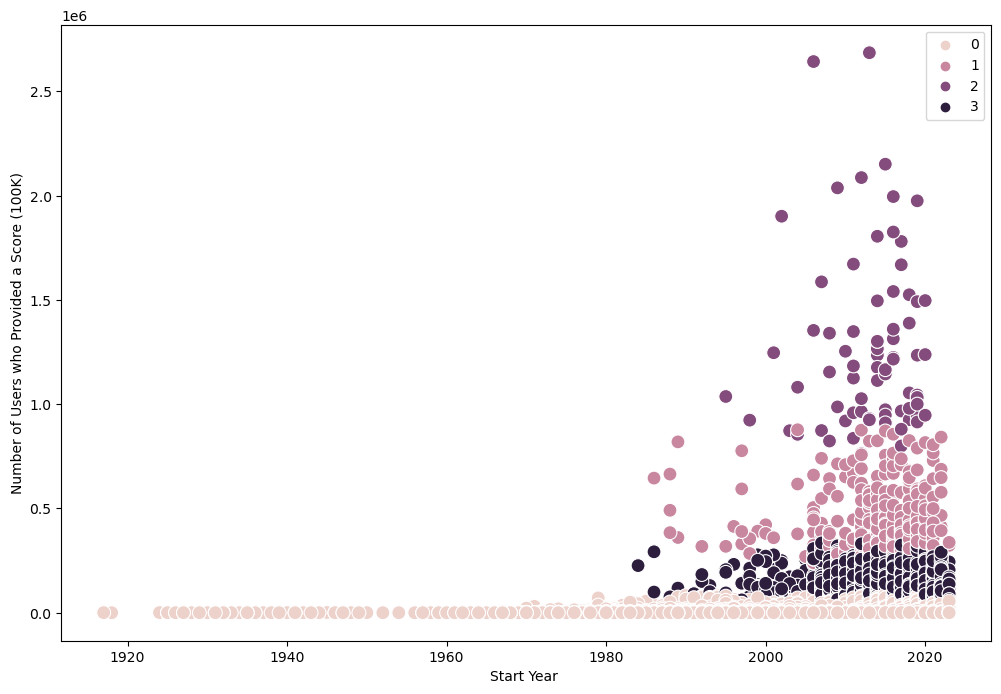

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['start_year'], y=sub['scored_by'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Year ') # Label x-axis.
plt.ylabel('Number of Users who Provided a Score (100K)') # Label y-axis.
plt.show()

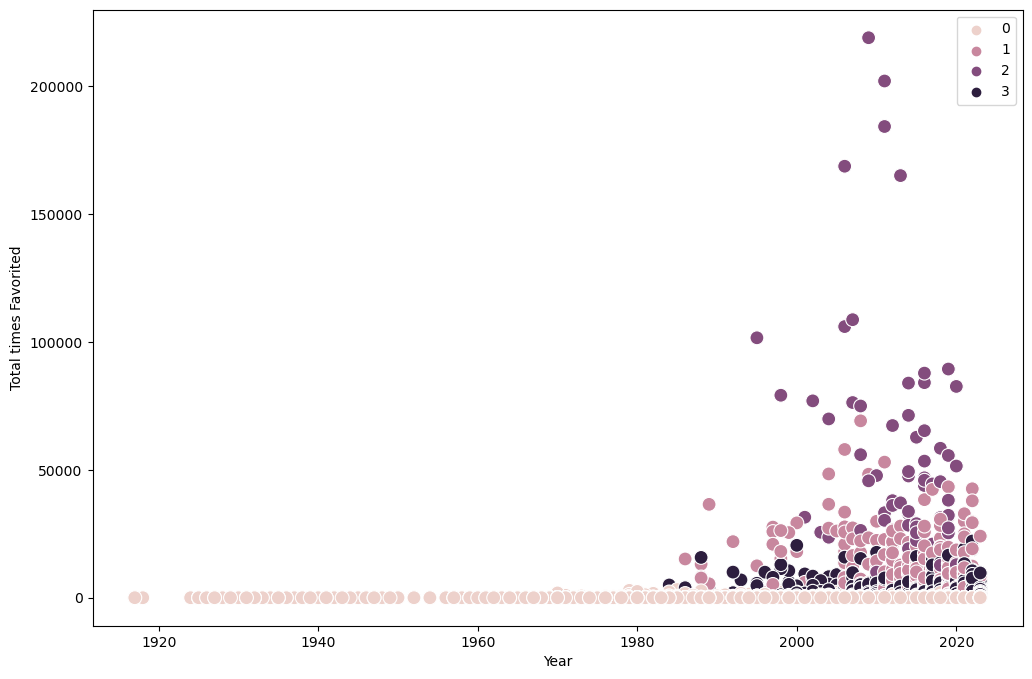

In [24]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['start_year'], y=sub['favorites'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Total times Favorited') # Label y-axis.
plt.show()

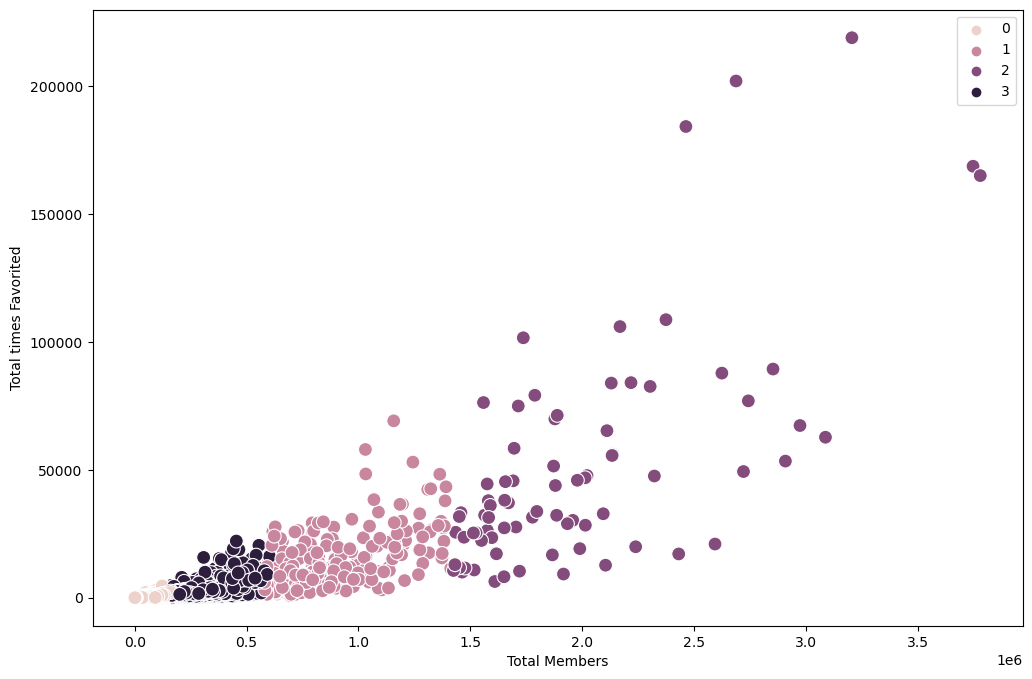

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['members'], y=sub['favorites'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Members') # Label x-axis.
plt.ylabel('Total times Favorited') # Label y-axis.
plt.show()

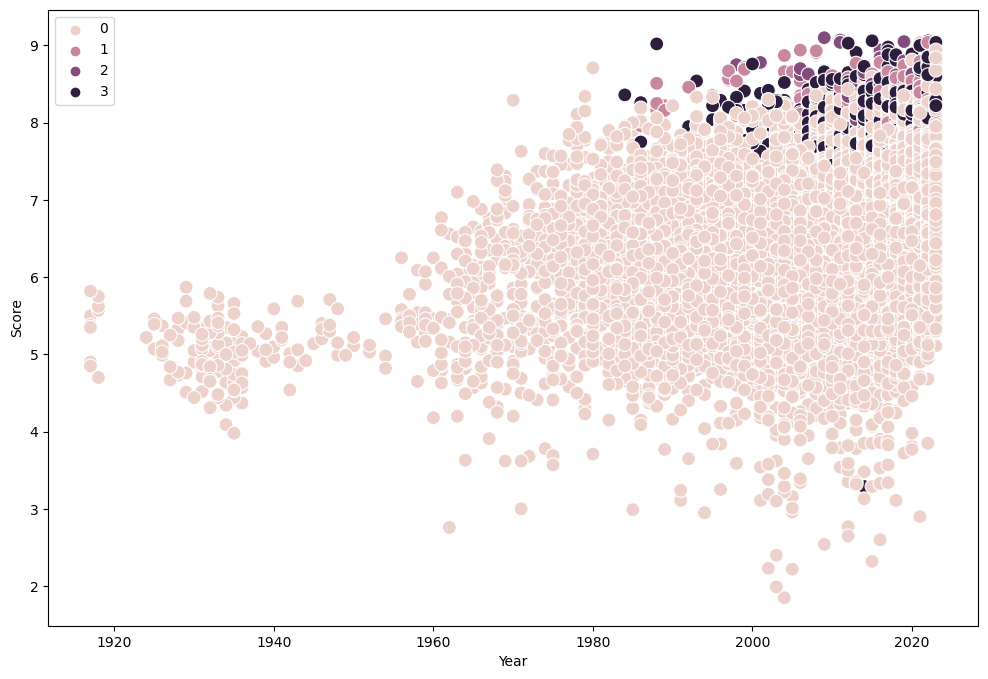

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['start_year'], y=sub['score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

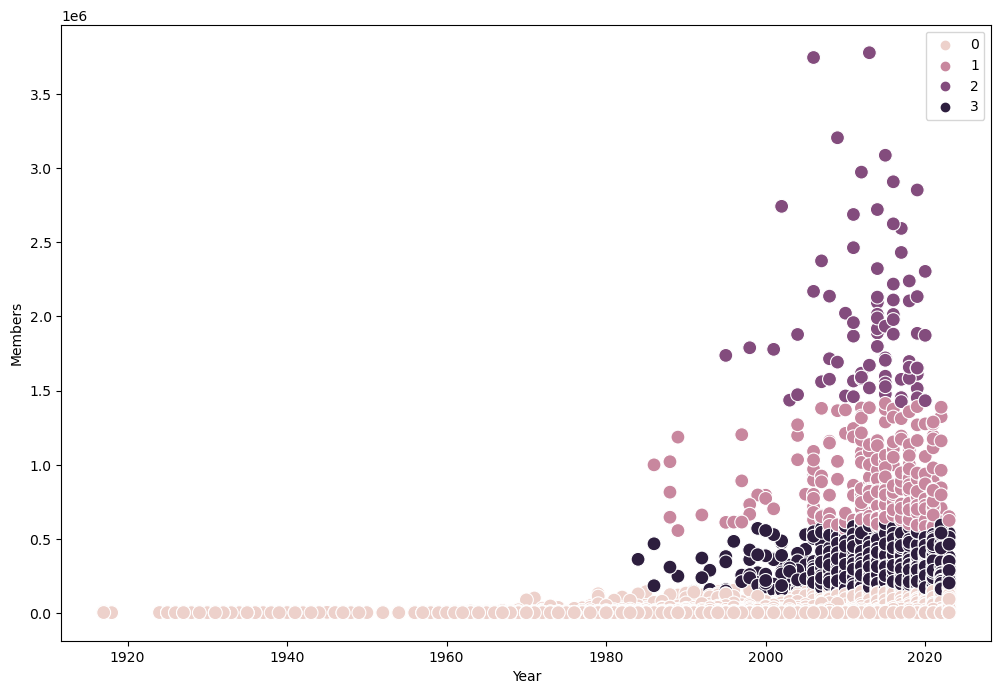

In [35]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['start_year'], y=sub['members'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Members') # Label y-axis.
plt.show()

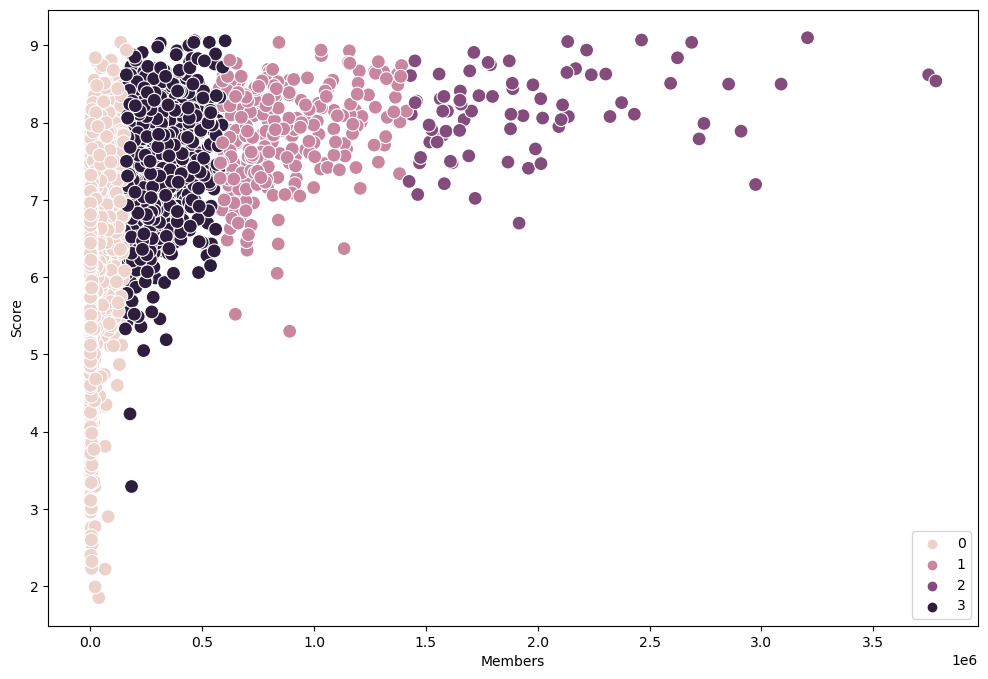

In [27]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['members'], y=sub['score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Members') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

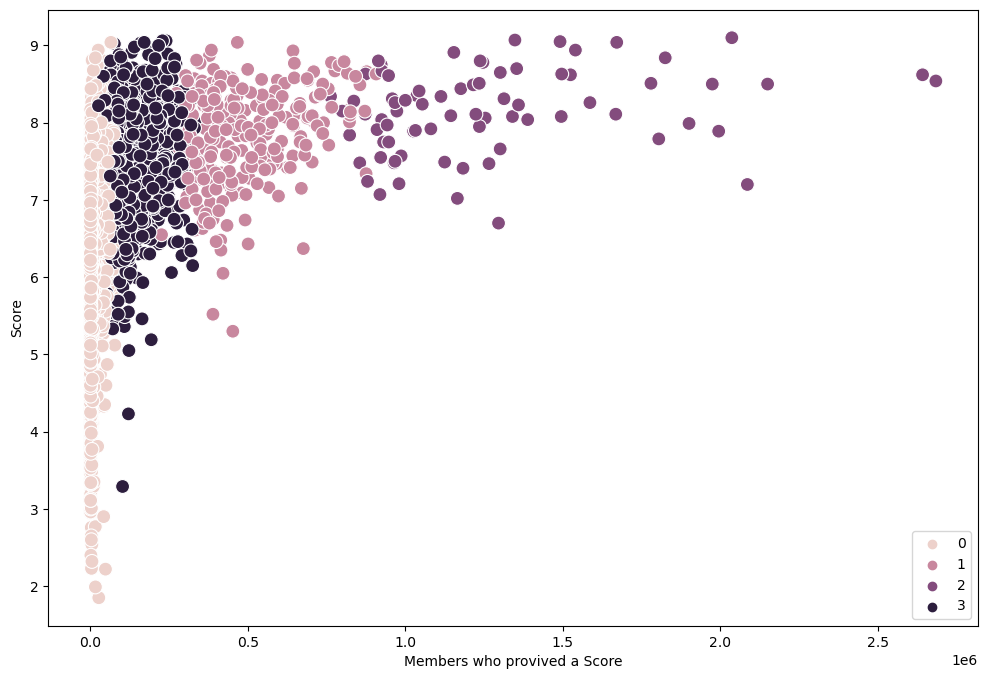

In [28]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['scored_by'], y=sub['score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Members who provived a Score') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

In [45]:
sub['clusters'].value_counts()

clusters
0    14533
3     1067
1      273
2       77
Name: count, dtype: int64

The lightest color (0) appears the most, followed by the darkest (3). All graphs follow a similar pattern when graphed with the exception of the graph protraying the year and score.

(0) has nearly 14 times as many as (3), this is going to require more analyzing 

In [42]:
cluster_avg = sub.groupby('cluster').mean()[['start_year', 'score']]

In [30]:
#create a column that renames the clusters to colors 
sub.loc[sub['clusters'] == 0, 'cluster'] = 'peach'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'pink'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 3, 'cluster'] = 'black'

In [31]:
sub.groupby('cluster').agg({
    'score':['mean','median'],
    'members':['mean','median'],
    'favorites':['mean','median']
})

score              members                favorites         
             mean median          mean     median          mean   median
cluster                                                                 
black    7.477676   7.49  2.873205e+05   256259.0   2245.673852   1340.0
peach    6.304474   6.32  1.609519e+04     3686.0     59.219019      5.0
pink     7.819744   7.90  8.558292e+05   797661.0  12556.340659   9379.0
purple   8.157013   8.15  1.989541e+06  1872476.0  51547.662338  37117.0

## Conlusion

The clusters reveal distinct patterns in scores, popularity (member count), and fan engagement (favorites count). 'Purple' signifies highly acclaimed anime with substantial popularity and a dedicated fan base. 'Peach' indicates lower scores and less popularity, possibly representing niche or less mainstream anime. 'Pink' stands out for its high scores, popularity, and a strong fan base. 'Black' is characterized by well-received anime with moderate popularity and fan engagement.

Of course, there are most likely other factors (including but not limited to bias) into this that can be explored with further analysis.

## Usefulness

Clustering in the anime industry brings about a more dynamic and responsive ecosystem. Using clustering can lead to enhancing content delivery, fan engagement, and overall industry success. The ability to adapt strategies based on viewer preferences contributes to a thriving anime landscape.